In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Refetched_LowerElection_Videos.csv")
df = df[~df['view count'].isna()]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10898 entries, 0 to 10919
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10898 non-null  object 
 1   published at   10898 non-null  object 
 2   channel Id     10898 non-null  object 
 3   channelTitle   10898 non-null  object 
 4   title          10898 non-null  object 
 5   description    8860 non-null   object 
 6   tags           10898 non-null  object 
 7   thumbnailUrl   10898 non-null  object 
 8   category Id    10898 non-null  object 
 9   view count     10898 non-null  object 
 10  like count     10897 non-null  float64
 11  comment count  10897 non-null  float64
 12  duration       10897 non-null  object 
 13  caption        10897 non-null  object 
 14  channelLabel   0 non-null      float64
dtypes: float64(3), object(12)
memory usage: 1.3+ MB


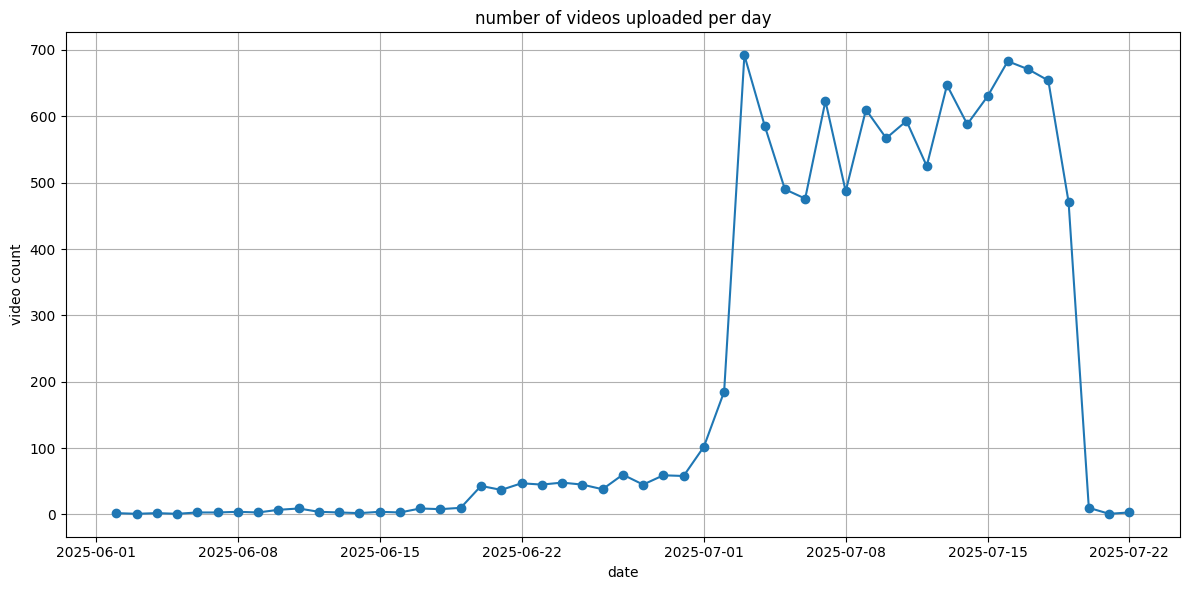

In [4]:
# ISO8601形式（例: 2025-07-14T09:00:17Z）を日付(datetime型)に変換し、日付のみ抽出
df["published at"] = pd.to_datetime(df["published at"], errors="coerce")
df = df.dropna(subset=["published at"])
df["published at"] = df["published at"].dt.date

# 日ごとの動画数を集計
daily_counts = df["published at"].value_counts().sort_index()

# 可視化（線グラフ）
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
daily_counts.plot(kind='line', marker='o')
plt.title('number of videos uploaded per day')
plt.xlabel('date')
plt.ylabel('video count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# 2025-07-01から2025-07-19の範囲でフィルタ
start_date = pd.to_datetime('2025-07-01').date()
end_date = pd.to_datetime('2025-07-19').date()
df = df[(df["published at"] >= start_date) & (df["published at"] <= end_date)]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10280 entries, 0 to 10919
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10280 non-null  object 
 1   published at   10280 non-null  object 
 2   channel Id     10280 non-null  object 
 3   channelTitle   10280 non-null  object 
 4   title          10280 non-null  object 
 5   description    8280 non-null   object 
 6   tags           10280 non-null  object 
 7   thumbnailUrl   10280 non-null  object 
 8   category Id    10280 non-null  object 
 9   view count     10280 non-null  object 
 10  like count     10280 non-null  float64
 11  comment count  10280 non-null  float64
 12  duration       10280 non-null  object 
 13  caption        10280 non-null  object 
 14  channelLabel   0 non-null      float64
dtypes: float64(3), object(12)
memory usage: 1.3+ MB


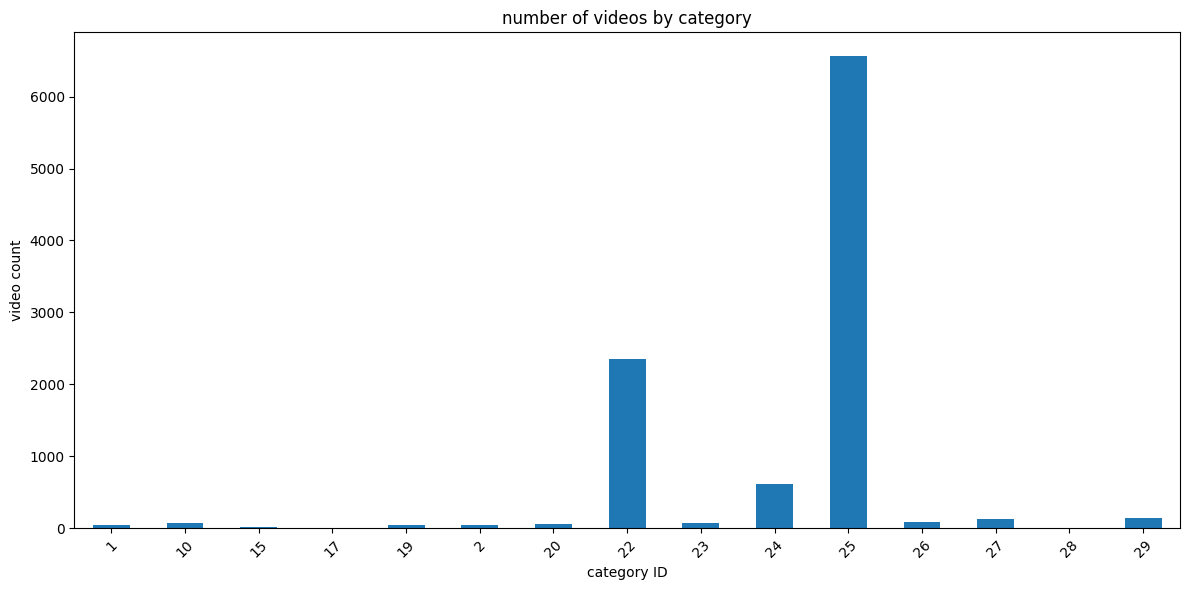

In [7]:
df["category Id"] = df["category Id"].astype(str)
df["category Id"].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('number of videos by category')
plt.xlabel('category ID')
plt.ylabel('video count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
df['category Id'].value_counts()

category Id
25    6565
22    2353
24     617
29     147
27     131
26      93
23      75
10      67
20      66
1       52
19      44
2       39
15      13
28      10
17       8
Name: count, dtype: int64

In [9]:
counts = df['category Id'].value_counts(normalize=True) * 100
counts

category Id
25    63.861868
22    22.889105
24     6.001946
29     1.429961
27     1.274319
26     0.904669
23     0.729572
10     0.651751
20     0.642023
1      0.505837
19     0.428016
2      0.379377
15     0.126459
28     0.097276
17     0.077821
Name: proportion, dtype: float64

In [12]:
df["view count"] = df["view count"].astype(float).astype(int)
df["like count"] = df["like count"].astype(float).astype(int)
df["comment count"] = df["comment count"].astype(float).astype(int)

In [13]:
df["view count"] = df["view count"].astype(int)
df["like count"] = df["like count"].astype(int)
df["comment count"] = df["comment count"].astype(int)

In [15]:
df.sort_values(by="view count", ascending=False, inplace=True)
df.head(10)[["title", "channelTitle", "view count", "like count", "comment count"]]

,title,channelTitle,view count,like count,comment count
6373,「日本を動かす 暮らしを豊かに」,自民党,8629175,485,0
8174,物価高から、あなたを守り抜く ガソリン減税編,立憲民主党,5999036,212,95
6939,選挙における開票作業について #参院選 #マリカ #舞踊家,日本政治TIME,5558451,155556,6312
9613,【奨学金減税で手取りを増やす】公明党 斉藤代表,公明党チャンネル,5364444,1270,0
8167,物価高から、あなたを守り抜く 食料品消費税ゼロ編,立憲民主党,5257094,208,109
7500,#アクション自民党 特殊詐欺に闇バイト 日本の治安大丈夫？,自民党,5124104,34,0
9603,【国が資産運用をして財源をつくる】公明党 岡本政調会長,公明党チャンネル,4868161,1598,0
8093,シングル世帯に安心を,立憲民主党,4790425,272,18
8092,農業支援編,立憲民主党,4705226,183,21
525,“Step by Step” 一歩ずつ着実に「この国を動かす責任がある。」ver2,自民党,4648289,108,0


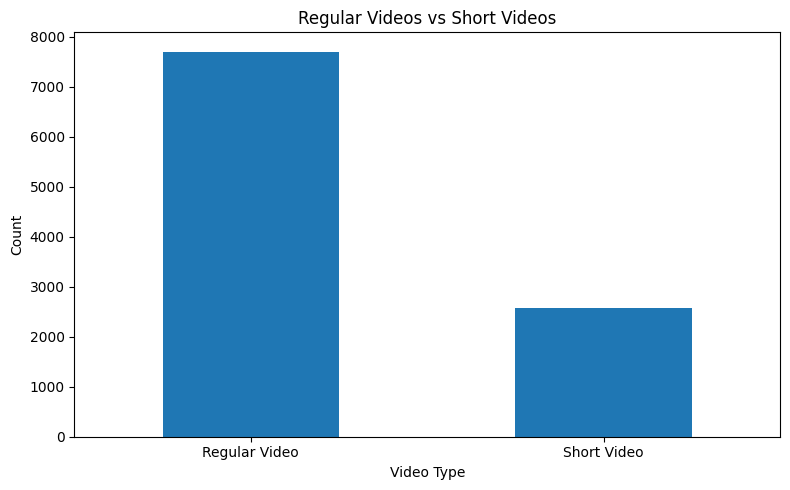

In [16]:
import re
def iso8601_duration_to_seconds(duration):
    if not isinstance(duration, str):
        return None
    pattern = re.compile(r'PT(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?')
    match = pattern.fullmatch(duration)
    if not match:
        return None
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    seconds = int(match.group(3)) if match.group(3) else 0
    return hours * 3600 + minutes * 60 + seconds

# duration列を秒数に変換
df['duration_seconds'] = df['duration'].apply(iso8601_duration_to_seconds)

# 60秒以下ならショート動画(1)、それ以外は通常動画(0)
df['is_short'] = (df['duration_seconds'] <= 60).astype(int)
df['is_short'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title('Regular Videos vs Short Videos')
plt.xlabel('Video Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Regular Video', 'Short Video'], rotation=0)
plt.tight_layout()
plt.show()

In [17]:
# ショート動画・通常動画の割合（%）を算出
counts = df['is_short'].value_counts(normalize=True) * 100
print(f"ショート動画: {counts.get(1, 0):.2f}%")
print(f"通常動画: {counts.get(0, 0):.2f}%")

ショート動画: 25.07%
通常動画: 74.93%


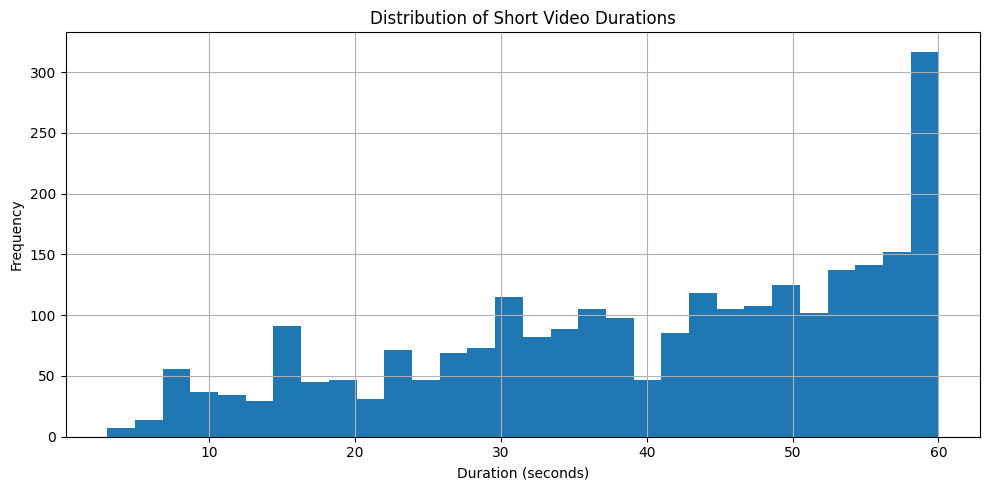

In [18]:
df_short = df[df['is_short'] == 1]
df_short['duration_seconds'].describe()
df_short['duration_seconds'].plot(kind='hist', bins=30, figsize=(10, 5))
plt.title('Distribution of Short Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()  

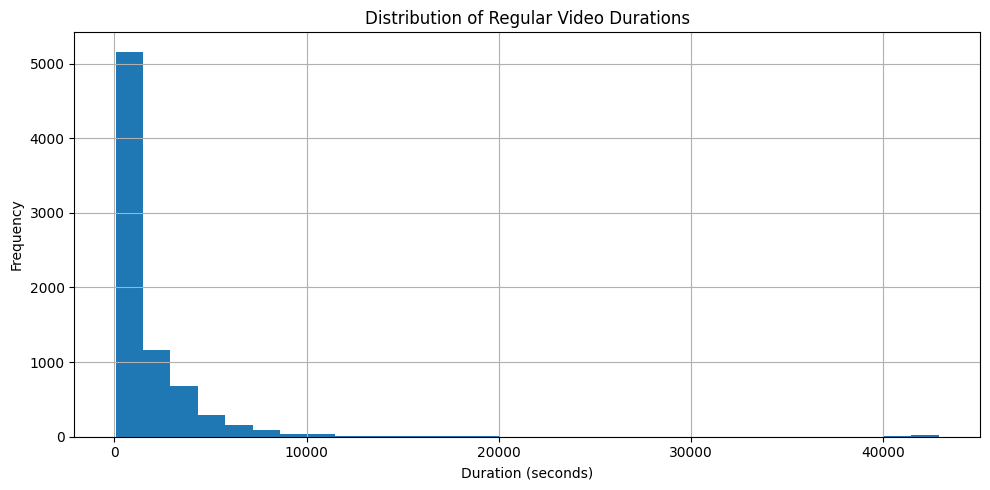

In [19]:
df_regular = df[df['is_short'] == 0]
df_regular['duration_seconds'].describe()
df_regular['duration_seconds'].plot(kind='hist', bins=30, figsize=(10, 5))
plt.title('Distribution of Regular Video Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()  

In [20]:
df_short["view count"] = df_short["view count"].astype(int)
df_short["like count"] = df_short["like count"].astype(int)
df_short["comment count"] = df_short["comment count"].astype(int)
df_short.sort_values(by = 'view count', ascending=False, inplace=True)
df_short.head(10)[["title", "channelTitle", "view count", "like count", "comment count"]]

/var/folders/ps/3mm02z5n04sgy_cq2yxf390h0000gn/T/ipykernel_44329/1255926412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["view count"] = df_short["view count"].astype(int)
/var/folders/ps/3mm02z5n04sgy_cq2yxf390h0000gn/T/ipykernel_44329/1255926412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short["like count"] = df_short["like count"].astype(int)
/var/folders/ps/3mm02z5n04sgy_cq2yxf390h0000gn/T/ipykernel_44329/1255926412.py:3: SettingWithCopyWarning: 
A value is trying to be set o

,title,channelTitle,view count,like count,comment count
6373,「日本を動かす 暮らしを豊かに」,自民党,8629175,485,0
6939,選挙における開票作業について #参院選 #マリカ #舞踊家,日本政治TIME,5558451,155556,6312
9613,【奨学金減税で手取りを増やす】公明党 斉藤代表,公明党チャンネル,5364444,1270,0
7500,#アクション自民党 特殊詐欺に闇バイト 日本の治安大丈夫？,自民党,5124104,34,0
9603,【国が資産運用をして財源をつくる】公明党 岡本政調会長,公明党チャンネル,4868161,1598,0
8092,農業支援編,立憲民主党,4705226,183,21
525,“Step by Step” 一歩ずつ着実に「この国を動かす責任がある。」ver2,自民党,4648289,108,0
643,【減税も給付も実現する】公明党岡本政調会長,公明党チャンネル,4315134,2930,560
7499,#アクション自民党 スピード重視の物価高対策！,自民党,3912750,26,0
7501,#アクション自民党 ウチの会社にも賃上げの波を！,自民党,3704931,20,0


In [21]:
df_regular["view count"] = df_regular["view count"].astype(int)
df_regular["like count"] = df_regular["like count"].astype(int)
df_regular["comment count"] = df_regular["comment count"].astype(int)
df_regular.sort_values(by = 'view count', ascending=False, inplace=True)
df_regular.head(10)[["title", "channelTitle", "view count", "like count", "comment count"]]

/var/folders/ps/3mm02z5n04sgy_cq2yxf390h0000gn/T/ipykernel_44329/2701222333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular["view count"] = df_regular["view count"].astype(int)
/var/folders/ps/3mm02z5n04sgy_cq2yxf390h0000gn/T/ipykernel_44329/2701222333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_regular["like count"] = df_regular["like count"].astype(int)
/var/folders/ps/3mm02z5n04sgy_cq2yxf390h0000gn/T/ipykernel_44329/2701222333.py:3: SettingWithCopyWarning: 
A value is trying to 

,title,channelTitle,view count,like count,comment count
8174,物価高から、あなたを守り抜く ガソリン減税編,立憲民主党,5999036,212,95
8167,物価高から、あなたを守り抜く 食料品消費税ゼロ編,立憲民主党,5257094,208,109
8093,シングル世帯に安心を,立憲民主党,4790425,272,18
3666,【参院選2025 完全解説&予想】減税か給付金か！少数与党の逆説と野党の勝機とは？,中田敦彦のYouTube大学 - NAKATA UNIVERSITY,3963832,59562,5587
4456,ジョーカー議員としばき隊の前で演説してみた #河合悠祐 #参院選,石川典行チャンネル,2815337,74861,1726
3676,【選挙の日、そのまえに】news23で党首討論 物価高対策などめぐり論戦 7月3日公示・参議...,TBS NEWS DIG Powered by JNN,2779766,20277,16871
534,皆さんに気持ちと想いを繋ぎたい #日本人ファースト #日本人ファースト参政党 #参政党...,参政党,2122041,94749,2854
5114,【参院選徹底解説】参政党大躍進？NHK党もあり？#井川意高#大王製紙#石破茂#岸田文雄#安倍...,日本の政治・経済を斬る,1935201,26633,594
6374,企業・団体献金はそこまで！ #立憲民主党 #野田佳彦 #政治 #企業団体献金 #政治とカネ,立憲民主党,1824664,166,50
2421,【玉木雄一郎】参院選は磐石か？戦略の解剖、ライバルの整理、そして「新・三本の矢」の真意とは！？,中田敦彦のYouTube大学 - NAKATA UNIVERSITY,1706405,28941,2739


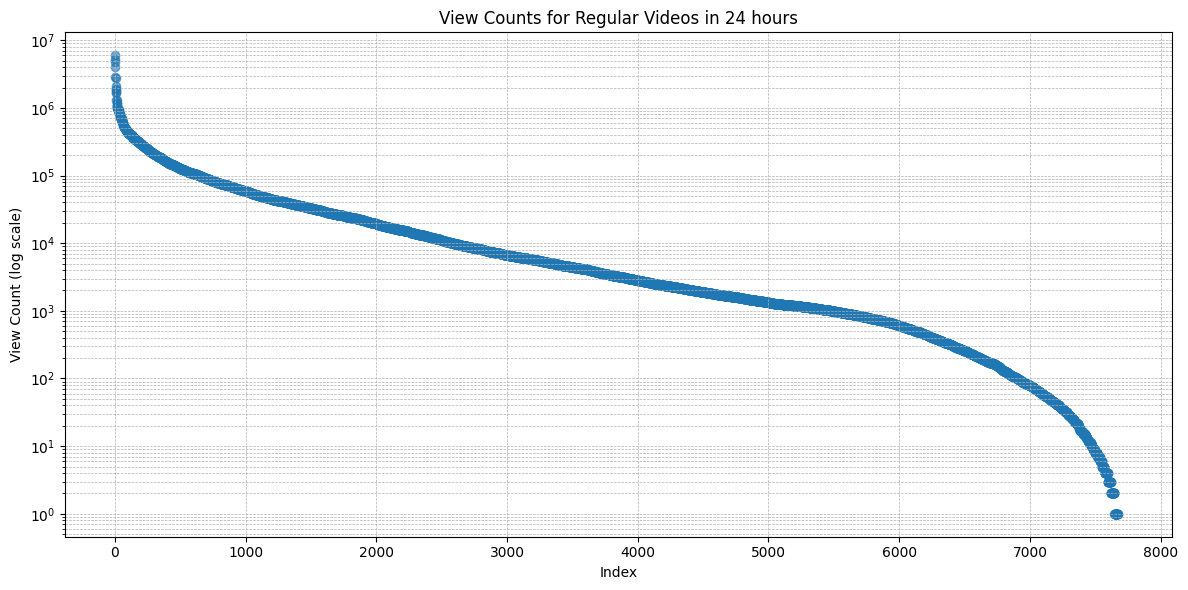

In [22]:
import numpy as np
plt.figure(figsize=(12,6))
x = np.arange(len(df_regular))
y = df_regular["view count"].values
plt.scatter(x, y, alpha=0.6)
plt.yscale('log')
plt.title('View Counts for Regular Videos in 24 hours')
plt.xlabel('Index')
plt.ylabel('View Count (log scale)')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()

In [23]:
df_regular["channelTitle"].value_counts().head(10)

channelTitle
日本維新の会                         348
れいわ新選組 公式チャンネル                 217
参政党                            154
日テレNEWS                        138
Ripbanwinkle                   120
石丸伸二と日本を動かそう                   110
テレ東BIZ                         106
日本共産党                          103
ANNnewsCH                       93
TBS NEWS DIG Powered by JNN     92
Name: count, dtype: int64

In [24]:
df_short["channelTitle"].value_counts().head(10)

channelTitle
れいわ新選組 公式チャンネル                 71
自民党                            63
日本維新の会                         59
安野貴博 @ 新党チームみらい                46
ニック徳田《ノンビリチャンネル》               38
立憲民主党                          38
立花孝志                           32
国民民主党                          32
TBS NEWS DIG Powered by JNN    31
参政党群馬県連YouTube                 28
Name: count, dtype: int64

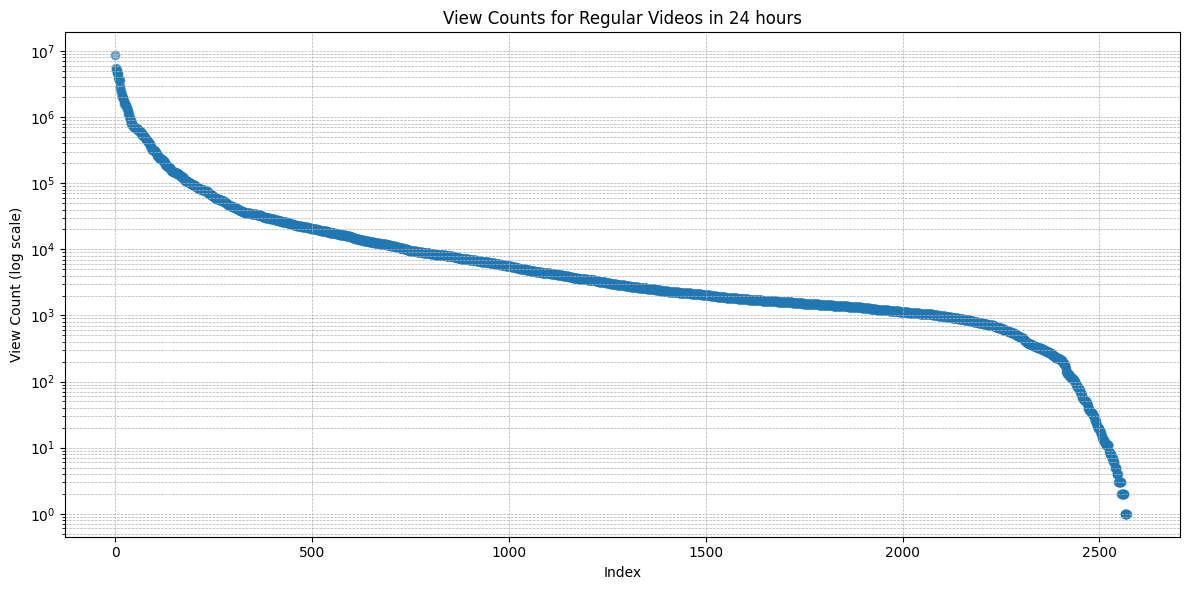

In [25]:
import numpy as np
plt.figure(figsize=(12,6))
x = np.arange(len(df_short))
y = df_short["view count"].values
plt.scatter(x, y, alpha=0.6)
plt.yscale('log')
plt.title('View Counts for Regular Videos in 24 hours')
plt.xlabel('Index')
plt.ylabel('View Count (log scale)')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()